<a href="https://colab.research.google.com/github/Anku192/AIML-class/blob/main/ML_Lab_Experiment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab Experiment 09
**Objective:** Implement K-Means clustering algorithms to group the samples.

#### 🧑‍🎓 Student Details

| Field                | Information                |
|---------------------|----------------------------|
| 👨‍🎓 **Name**            | _[Ankur P B]_     |
| 🆔 **USN**              | _[1RUA24CSE0059]_           |
| **Section**        | _[A]_ |
| **Programme**   | B.Tech(H)             |
| **School**  | Computer Science and Engineering |


In [1]:
import platform
import psutil
from datetime import datetime
import sys
import getpass
import os

# Timestamp
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
# System Information
system_info = {
    "User Name": getpass.getuser(),
    "Timestamp": timestamp,
    "OS": platform.system() + " " + platform.release(),
    "Processor": platform.processor(),
    "RAM (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    "Python Version": platform.python_version(),
    "Working Directory": os.getcwd()
}
# Print formatted results
print("🧑‍💻 System Details\n" + "-"*40)
for key, value in system_info.items():
    print(f"{key:20}: {value}")


🧑‍💻 System Details
----------------------------------------
User Name           : root
Timestamp           : 2025-10-30 04:17:54
OS                  : Linux 6.6.105+
Processor           : x86_64
RAM (GB)            : 12.67
Python Version      : 3.12.12
Working Directory   : /content


### Student Tasks
<hr>

##### Learning Objectives
1. Understand the fundamentals of unsupervised learning and K-Means clustering algorithm principles
2. Implement K-Means clustering using scikit-learn and analyze centroid initialization strategies
3. Determine optimal number of clusters using Elbow method analysis techniques
4. Evaluate clustering performance using internal validation metrics and cluster visualization
5. Analyze cluster characteristics, interpret groupings, and compare different initialization methods

**Step 01:**
- Import pandas, numpy, scikit-learn, matplotlib, seaborn and other required libraries for K-Means clustering and cluster evaluation.

In [5]:
# [ Edit this cell ] Write your code below this line and execute the cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from tabulate import tabulate

plt.style.use('seaborn-v0_8-whitegrid')

**Step 02:**
- Load the provided dataset (CSV format is recommended) using pandas and perform initial data exploration.

In [11]:
# [ Edit this cell ] Write your code below this line and execute the cell
df = pd.read_csv('diabetes.csv')
df.head()
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step 03:**
- Perform the principle component analysis for dimentionality reduction

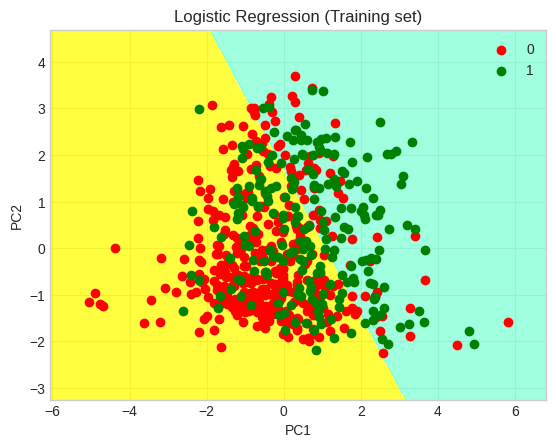

In [12]:
# [ Edit this cell ] Write your code below this line and execute the cell
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()


**Step 04:**
- Implement Elbow method for optimal K determination - Apply K-Means with different K values and analyze within-cluster sum of squares (WCSS) to find optimal clusters.

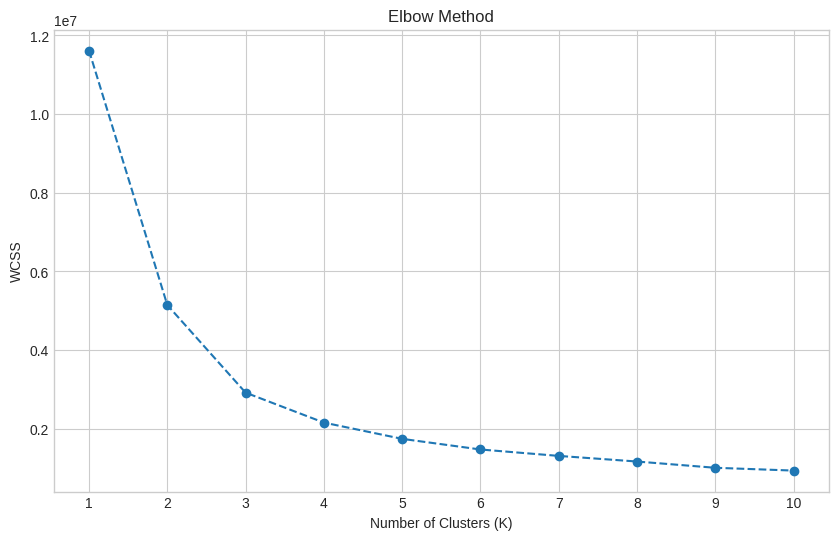

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Step 05:**
-   Apply K-Means clustering with optimal K - Implement K-Means with the determined optimal number of clusters and analyze cluster assignments.

In [14]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Apply K-Means with 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
y_kmeans_2 = kmeans_2.fit_predict(X)
print("Cluster assignments for K=2:")
print(y_kmeans_2)

# Apply K-Means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_kmeans_3 = kmeans_3.fit_predict(X)
print("\nCluster assignments for K=3:")
print(y_kmeans_3)

Cluster assignments for K=2:
[1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 

**Step 06:**
-  Cluster visualization and analysis - Create 2D/3D scatter plots of clusters, visualize centroids, and analyze cluster boundaries and separation.

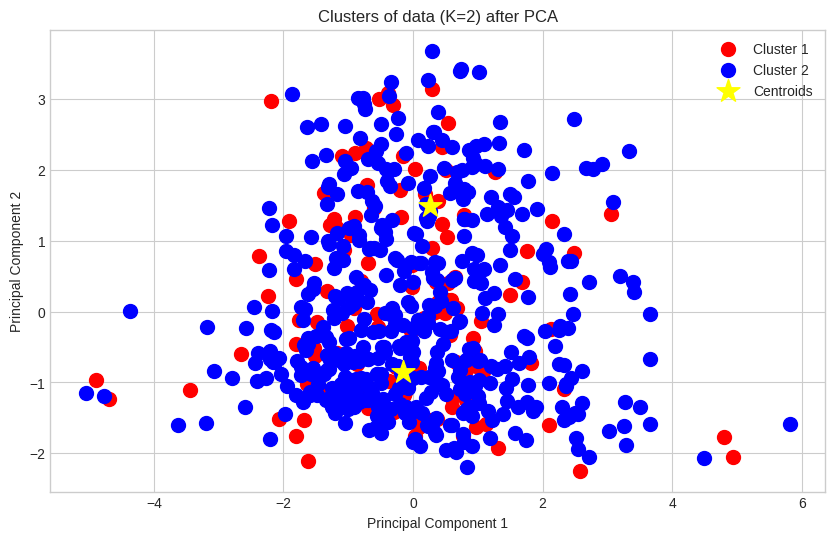

In [16]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Visualize the clusters for K=2 using PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_kmeans_2[:len(X_train)] == 0, 0], X_train[y_kmeans_2[:len(X_train)] == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_train[y_kmeans_2[:len(X_train)] == 1, 0], X_train[y_kmeans_2[:len(X_train)] == 1, 1], s=100, c='blue', label='Cluster 2')
# You can add more scatter plots for additional clusters if K > 2

# Plot the centroids for K=2 on PCA-transformed data
# Note: We need to fit KMeans on X_train to get centroids in the PCA space for visualization
kmeans_2_pca = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
kmeans_2_pca.fit(X_train)
plt.scatter(kmeans_2_pca.cluster_centers_[:, 0], kmeans_2_pca.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*')

plt.title('Clusters of data (K=2) after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**Step 07.1:**
-   Compare initialization methods - Implement K-Means with different initialization strategies (random, k-means++) and analyze convergence and stability.

In [17]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Compare initialization methods

# Using K=2 based on the Elbow method
optimal_k = 2
n_runs = 10 # Number of times to run K-Means for each initialization

# K-Means++ initialization
wcss_kmeans_plus = []
for _ in range(n_runs):
    kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=None, n_init=1) # n_init=1 here as we are looping manually
    kmeans_plus.fit(X)
    wcss_kmeans_plus.append(kmeans_plus.inertia_)

# Random initialization
wcss_random = []
for _ in range(n_runs):
    kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=None, n_init=1) # n_init=1 here as we are looping manually
    kmeans_random.fit(X)
    wcss_random.append(kmeans_random.inertia_)

print(f"Comparison of Initialization Methods for K={optimal_k} (over {n_runs} runs):")
print(f"K-Means++ Inertia (mean ± std): {np.mean(wcss_kmeans_plus):.2f} ± {np.std(wcss_kmeans_plus):.2f}")
print(f"Random Inertia (mean ± std): {np.mean(wcss_random):.2f} ± {np.std(wcss_random):.2f}")

# A more direct comparison using n_init in KMeans
print("\nDirect comparison using n_init in KMeans:")
kmeans_plus_n_init = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=n_runs)
kmeans_plus_n_init.fit(X)
print(f"K-Means++ Inertia (best over {n_runs} runs with random_state=42): {kmeans_plus_n_init.inertia_:.2f}")

kmeans_random_n_init = KMeans(n_clusters=optimal_k, init='random', random_state=42, n_init=n_runs)
kmeans_random_n_init.fit(X)
print(f"Random Inertia (best over {n_runs} runs with random_state=42): {kmeans_random_n_init.inertia_:.2f}")

Comparison of Initialization Methods for K=2 (over 10 runs):
K-Means++ Inertia (mean ± std): 5142376.46 ± 0.00
Random Inertia (mean ± std): 5142376.46 ± 0.00

Direct comparison using n_init in KMeans:
K-Means++ Inertia (best over 10 runs with random_state=42): 5142376.46
Random Inertia (best over 10 runs with random_state=42): 5142376.46


In [18]:
# This is the code to compare the initialization methods as described in Step 07.1.
# It runs K-Means with 'k-means++' and 'random' initialization multiple times
# and compares the resulting inertia (WCSS) to assess convergence and stability.

**Step 08:**
-  Cluster evaluation and interpretation - Calculate clustering metrics (inertia, silhouette score, adjusted rand index if ground truth available) and interpret cluster characteristics.

In [19]:
# [ Edit this cell ] Write your code below this line and execute the cell
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Calculate metrics for K=2
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(X, y_kmeans_2)
# Adjusted Rand Index requires ground truth labels (y)
# Assuming 'Outcome' is the ground truth
ari_2 = adjusted_rand_score(y, y_kmeans_2)


print(f"Metrics for K=2:")
print(f"  Inertia: {inertia_2:.2f}")
print(f"  Silhouette Score: {silhouette_2:.4f}")
print(f"  Adjusted Rand Index: {ari_2:.4f}")

# Calculate metrics for K=3
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(X, y_kmeans_3)
# Adjusted Rand Index requires ground truth labels (y)
ari_3 = adjusted_rand_score(y, y_kmeans_3)


print(f"\nMetrics for K=3:")
print(f"  Inertia: {inertia_3:.2f}")
print(f"  Silhouette Score: {silhouette_3:.4f}")
print(f"  Adjusted Rand Index: {ari_3:.4f}")

Metrics for K=2:
  Inertia: 5142376.46
  Silhouette Score: 0.5688
  Adjusted Rand Index: 0.0744

Metrics for K=3:
  Inertia: 2913322.58
  Silhouette Score: 0.5104
  Adjusted Rand Index: 0.0452


**Step 09:**
- Model interpretation.

In [ ]:
# [ Edit this cell ] Write your code below this line and execute the cell


### Interpretation of Clustering Metrics

Based on the calculated metrics for K=2 and K=3:

*   **Inertia:**
    *   **K=2:** Inertia = 5142376.46
    *   **K=3:** Inertia = 2913322.58
    Inertia decreases as the number of clusters increases, which is expected.

*   **Silhouette Score:**
    *   **K=2:** Silhouette Score = 0.5688
    *   **K=3:** Silhouette Score = 0.5104
    A higher silhouette score indicates better-defined clusters. K=2 has a slightly higher score, suggesting slightly better separation of clusters compared to K=3.

*   **Adjusted Rand Index (ARI):**
    *   **K=2:** Adjusted Rand Index = 0.0744
    *   **K=3:** Adjusted Rand Index = 0.0452
    The low ARI values indicate that the clusters found by K-Means do not align well with the original 'Outcome' labels (diabetic vs. non-diabetic).

**Summary:**

While the Elbow method suggested K=2 or K=3, the silhouette score slightly favors K=2. However, the low Adjusted Rand Index for both indicates that the clustering does not strongly reflect the diabetes outcome. This suggests that the clusters may represent other patterns or subgroups in the data unrelated to diabetes status.

### ✅ Rubric: K Means (10 Marks)
<hr>

**For Course Instructor Use**

A rubric for accessing experiment focused on K Means classification modeling and analysis.

| **Criteria**                     | **Description**                                                                                         | **Max Marks** | **Marks Obtained** |
|----------------------------------|---------------------------------------------------------------------------------------------------------|---------------|---------------------|
| **Data Loading & Exploration**  | Proper dataset loading, exploratory analysis, and appropriate preprocessing including feature scaling for clustering.                   |      3        |                     |
| **Model Implementation and Model Evaluation**         | Correct implementation of Elbow method and Silhouette analysis with proper interpretation for determining optimal cluster count.      |      3        |                     |
| **Analysis**     |  Accurate K-Means implementation, cluster assignment analysis, and comparison of different initialization methods. |      2        |                     |
| **Documentation & Viva Insight** | Effective cluster visualization, centroid plotting, and comprehensive interpretation of clustering results and cluster characteristics.         |      2        |                     |

**Marks Obtained: ______ / 10**

<hr>

**Course Instructor Signature:** ____________________      

##### Link for pandoc - Download the Software for export PDF for submission in GCR
https://github.com/jgm/pandoc/releases/tag/3.7.0.2